In [1]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error as MAPE 

In [12]:
# 读取player 的数据
player = pd.read_csv("../datafrom200/goalkeeper.csv")
x_list = player.columns[-5:]
print(x_list)
X = player[x_list]
y = player["value"]
print(X.shape, y.shape)

Index(['GK_Diving', 'GK_Handling', 'GK_Kicking', 'GK_Positioning',
       'GK_Reflexes'],
      dtype='object')
(1111, 5) (1111,)


In [3]:
# 划分训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [13]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))


0.2835582823677172
0.015071928941485901


In [5]:

clf = linear_model.Lasso()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.2835582823677113
0.015071909910598147


In [6]:
# Adaboost
from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor(n_estimators=15)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.6296858315689411


In [7]:
# XGBoost
import xgboost as xgb
bst = xgb.XGBRFRegressor(n_estimators=10, max_depth=20)
bst.fit(X_train, y_train)
print(bst.score(X_test, y_test))
print(MAPE(y_true=y_test, y_pred=bst.predict(X_test)))

0.5333274974148597
0.894411325236515


In [8]:
import lightgbm as lgb

cbr = lgb.LGBMRegressor()
cbr.fit(X_train, y_train)
print(cbr.score(X_train, y_train))
print(cbr.score(X_test, y_test))
print(MAPE(y_true=y_test, y_pred=cbr.predict(X_test)))

0.7850023662269591
0.667168155745191
0.9473255100287672


In [9]:

# 随机森林
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9650569556438868
0.4992170195558029


In [10]:
# GBDT
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()
reg.fit(X_train, y_train, )
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.9878842597224503
0.7223329619493826


In [11]:
# Catboost
import catboost
reg = catboost.CatBoostRegressor()
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

Learning rate set to 0.040937
0:	learn: 8434534.5591769	total: 53.8ms	remaining: 53.7s
1:	learn: 8230525.1318085	total: 54.8ms	remaining: 27.4s
2:	learn: 8030291.3382123	total: 56ms	remaining: 18.6s
3:	learn: 7841438.8373876	total: 56.8ms	remaining: 14.1s
4:	learn: 7701361.5455867	total: 57.4ms	remaining: 11.4s
5:	learn: 7522449.5214864	total: 58.1ms	remaining: 9.62s
6:	learn: 7357019.5831031	total: 58.8ms	remaining: 8.34s
7:	learn: 7208305.2544980	total: 59.4ms	remaining: 7.37s
8:	learn: 7057038.8342992	total: 60.6ms	remaining: 6.67s
9:	learn: 6918080.2038331	total: 61.5ms	remaining: 6.09s
10:	learn: 6774578.2578896	total: 62.3ms	remaining: 5.6s
11:	learn: 6645774.3523198	total: 63ms	remaining: 5.19s
12:	learn: 6516373.9947087	total: 63.5ms	remaining: 4.82s
13:	learn: 6394239.8265707	total: 64.2ms	remaining: 4.52s
14:	learn: 6289692.2465860	total: 64.8ms	remaining: 4.25s
15:	learn: 6168760.7026932	total: 65.3ms	remaining: 4.02s
16:	learn: 6064901.3081198	total: 65.9ms	remaining: 3.81s

<class 'pandas.core.frame.DataFrame'>


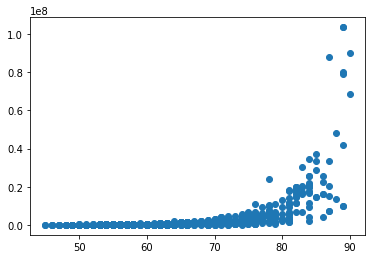

In [30]:
from matplotlib import pyplot as plt 
print(type(X))
plt.scatter(X.iloc[::,4], y)
plt.show()